## 数据分析咖哥十话

## 第1话 横看成岭侧成峰：用用户画像揭示秘密

**题解** 用户画像是根据业务需求，对用户的人口统计特征、社会属性及行为标签进行有目的性的提炼，包括用户人口统计学特征画像、用户行为画像、用户兴趣画像等。本话题目借用苏轼的名句“横看成岭侧成峰”暗示对于不同的用户群体而言，同样的广告、推广文案或者促销获客活动有可能产生完全不同的效果。

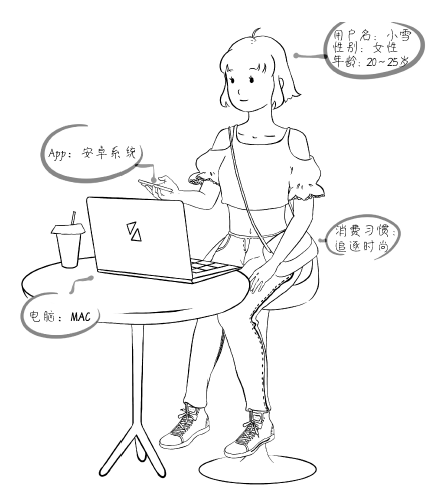

<center>用户画像</center>

**详细内容请参考拙作：《数据分析咖哥十话》** 人民邮电出版社2022年出版
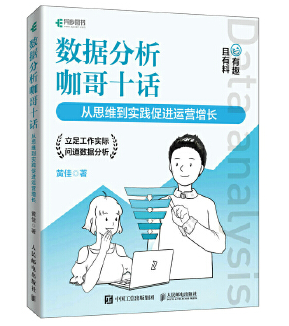
购书链接：https://item.jd.com/13335199.html

In [1]:
import numpy as np # 导入数学计算工具包
import pandas as pd # 导入数据处理工具包

In [2]:
df_user = pd.read_csv('爆款产品.csv') # 载入数据集
df_user.head() # 显示前5 行数据

,用户编号,年龄,性别,状态,下单次数,视力,年收入,年消费,近期购买产品,已注册月
0,U004,19,女,单身,3,3,22973,85,贝尔防蓝光眼镜(高级黑),2
1,U067,36,女,单身,4,3,34343,94,贝尔防蓝光眼镜(高级黑),2
2,U147,24,女,单身,4,5,51006,100,9色钻石珠光眼影盘,6
3,U149,24,男,单身,5,5,62291,200,9色钻石珠光眼影盘,6
4,U087,21,女,有朋友,2,2,22973,53,敦乐视疲劳滴眼液(13ML),2


,用户编号,年龄,性别,状态,下单次数,视力,年收入,年消费,近期购买产品,已注册月
0,U004,19,女,单身,3,3,22973,85,贝尔防蓝光眼镜(高级黑),2
1,U067,36,女,单身,4,3,34343,94,贝尔防蓝光眼镜(高级黑),2
2,U147,24,女,单身,4,5,51006,100,9色钻石珠光眼影盘,6
3,U149,24,男,单身,5,5,62291,200,9色钻石珠光眼影盘,6
4,U087,21,女,有朋友,2,2,22973,53,敦乐视疲劳滴眼液(13ML),2


In [3]:
df_user.shape #df_user 的形状

(180, 10)

(180, 10)

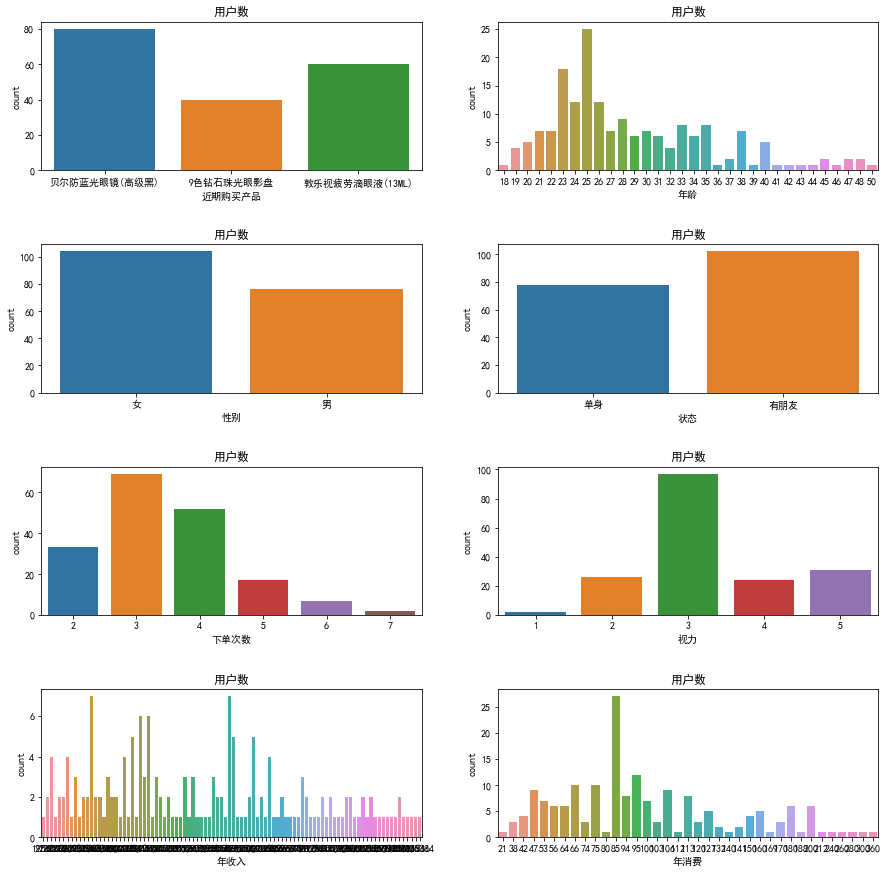

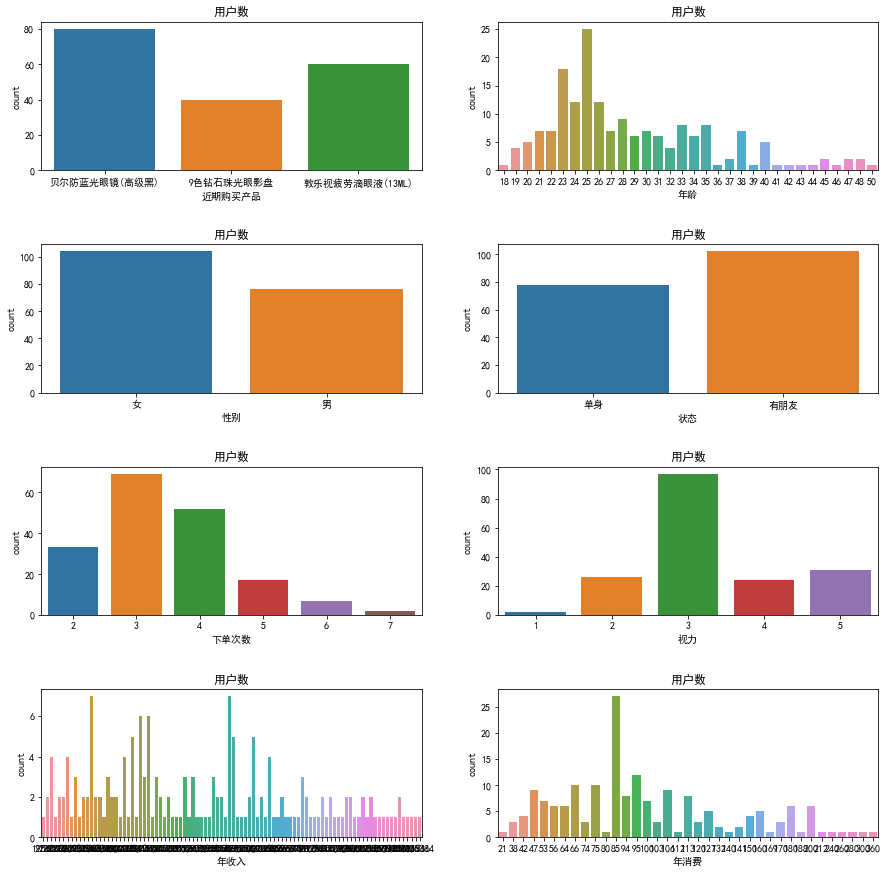

In [4]:
import matplotlib.pyplot as plt # 导入Matplotlib 的pyplot 模块
import seaborn as sns # 导入Seaborn
plt.rcParams["font.family"]=['SimHei'] #用来设定字体样式
plt.rcParams['font.sans-serif']=['SimHei'] #用来设定无衬线字体样式
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# 显示数据集中各个特征的分布情况
features=[ '近期购买产品', '年龄', '性别', '状态',
    '下单次数', '视力', '年收入', '年消费']
fig=plt.subplots(figsize=(15, 15)) # 创建图窗和一组子图
for i, j in enumerate(features): # 遍历特征， i 是序列号，j 是字段名
    plt.subplot(4, 2, i+1) # 设定子图位置
    plt.subplots_adjust(hspace = 0.5) # 调整子图的间距
    # 计数图中将变量之一视为分类变量，并在相关轴的序数位置 (0、1、…、n) 绘制数据图像
    sns.countplot(x=j, data = df_user) # 绘制的子计数图是跨分类变量的直方图
    plt.title("用户数") # 设置标题

In [5]:
# 近期购买产品和性别的交叉统计表
pd.crosstab(df_user['近期购买产品'],df_user['性别'] )

性别,女,男
近期购买产品,,
9色钻石珠光眼影盘,33,7
敦乐视疲劳滴眼液(13ML),31,29
贝尔防蓝光眼镜(高级黑),40,40


性别,女,男
近期购买产品,,
9色钻石珠光眼影盘,33,7
敦乐视疲劳滴眼液(13ML),31,29
贝尔防蓝光眼镜(高级黑),40,40


<AxesSubplot:xlabel='近期购买产品', ylabel='count'>

<AxesSubplot:xlabel='近期购买产品', ylabel='count'>

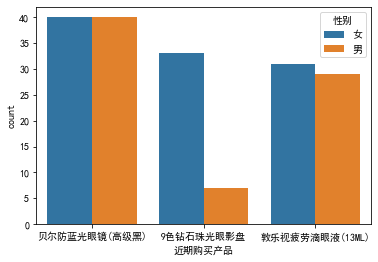

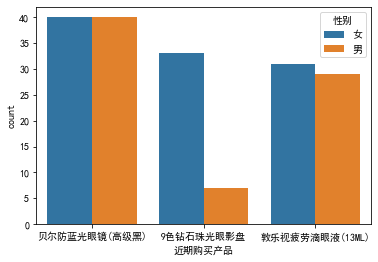

In [6]:
# 不同性别用户的近期购买产品对比计数图
sns.countplot(x="近期购买产品", hue="性别", data=df_user)

In [7]:
# 构建df_user 的子集df_eyeshade
df_eyeshade = df_user.loc[df_user['近期购买产品'] == '9色钻石珠光眼影盘'].reset_index(drop=True)
df_eyeshade.head() # 显示前5 行数据

,用户编号,年龄,性别,状态,下单次数,视力,年收入,年消费,近期购买产品,已注册月
0,U147,24,女,单身,4,5,51006,100,9色钻石珠光眼影盘,6
1,U149,24,男,单身,5,5,62291,200,9色钻石珠光眼影盘,6
2,U141,22,女,单身,4,3,38658,106,9色钻石珠光眼影盘,4
3,U167,29,女,有朋友,7,5,75906,300,9色钻石珠光眼影盘,4
4,U142,22,女,单身,3,5,44781,120,9色钻石珠光眼影盘,6


,用户编号,年龄,性别,状态,下单次数,视力,年收入,年消费,近期购买产品,已注册月
0,U147,24,女,单身,4,5,51006,100,9色钻石珠光眼影盘,6
1,U149,24,男,单身,5,5,62291,200,9色钻石珠光眼影盘,6
2,U141,22,女,单身,4,3,38658,106,9色钻石珠光眼影盘,4
3,U167,29,女,有朋友,7,5,75906,300,9色钻石珠光眼影盘,4
4,U142,22,女,单身,3,5,44781,120,9色钻石珠光眼影盘,6


C:\Users\huangj2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\huangj2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='年龄', ylabel='Density'>

<AxesSubplot:xlabel='年龄', ylabel='Density'>

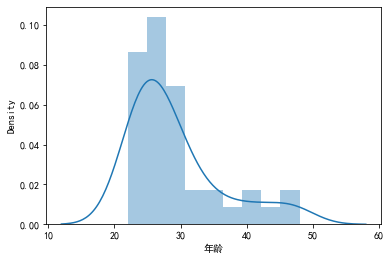

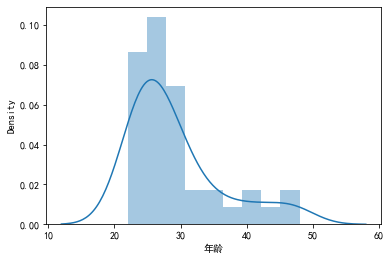

In [8]:
sns.distplot(df_eyeshade['年龄']) # 年龄分布直方图（带核密度估计曲线）

<AxesSubplot:xlabel='年龄', ylabel='count'>

<AxesSubplot:xlabel='年龄', ylabel='count'>

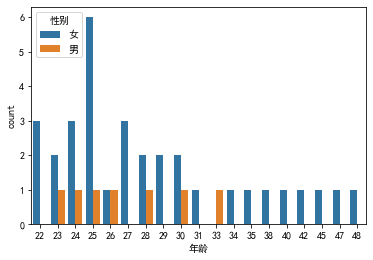

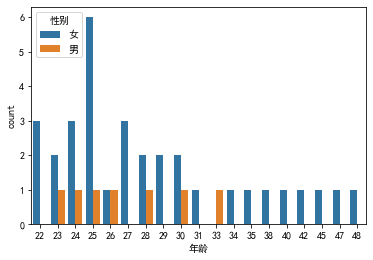

In [9]:
sns.countplot(x="年龄", hue="性别", data=df_eyeshade) # 不同性别的用户年龄计数图

In [10]:
# 消费人数数据透视表（按性别及有无男女朋友分组）
pd.pivot_table(df_eyeshade, '用户编号', index=['性别'],columns=['状态'], aggfunc=len)

状态,单身,有朋友
性别,,
女,19,14
男,3,4


状态,单身,有朋友
性别,,
女,19,14
男,3,4


**小雪看了看这个表，说道：“嗯，咖哥，我有一个看法——就目前搜集到的眼影盘消费者数据来看，绝大多数的眼影盘消费者是女生。而且，有意思的是购买眼影盘的单身女生人数多于有男朋友的女生。”**

那么，你的看法呢？

**详细内容请参考拙作：《数据分析咖哥十话》** 人民邮电出版社2022年出版